http://dawnmy.github.io/2016/10/24/Plot-heatmaap-with-side-color-indicating-the-class-of-variables/

In [14]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(font="Arial")

In [15]:
# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

In [17]:
df.columns.get_level_values("network")

Index(['1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '6', '6',
       '7', '7', '7', '7', '7', '7', '8', '8', '8', '8', '8', '8', '9', '9',
       '10', '10', '11', '11', '12', '12', '12', '12', '12', '13', '13', '13',
       '13', '13', '13', '14', '14', '15', '15', '16', '16', '16', '16', '16',
       '16', '16', '16', '17', '17', '17', '17', '17', '17', '17'],
      dtype='object', name='network')

In [18]:
# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
used_columns

array([ True,  True, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [19]:
df = df.loc[:, used_columns]

In [20]:
df

network           1                     5                     6             \
node              1                     1                     1              
hemi             lh         rh         lh         rh         lh         rh   
0         56.055744  92.031036 -35.898861  -1.889181   5.898688 -43.692322   
1         55.547253  43.690075  19.568010  15.902983 -23.231823 -10.745867   
2         60.997768  63.438793  19.247454  37.209419   2.392153  16.509109   
3         18.514868  12.657158  32.896915  11.199619 -14.665752   2.073715   
4         -2.527392 -63.104668  18.396759   3.219077 -41.856911 -24.690414   
..              ...        ...        ...        ...        ...        ...   
915       -7.429513  -4.813219   0.017912 -25.305094 -75.461159 -70.289261   
916      -33.554138 -38.605621 -32.935612 -21.783203 -16.198238 -34.893780   
917      -78.539566 -74.197189 -32.800556 -37.021500   2.098941 -18.581594   
918     -103.235825 -98.744286 -14.330512 -17.224781  -3.007454 -42.672840   
919      -36.288868 -10.762070  26.558777  21.377319   9.652065  12.693388   

network                                7             ...          16  \
node             2                     1             ...           3   
hemi            lh         rh         lh         rh  ...          rh   
0       -47.664265  12.284122   1.566538 -13.042585  ...    0.607904   
1        10.269546  31.275831 -26.309488 -18.077026  ...   57.495071   
2        -5.314236   2.372976  -7.342168 -24.550989  ...   28.317369   
3        32.634335  45.825409 -47.632999  -6.580215  ...   71.439629   
4       -33.975418 -24.149668  -6.315651 -29.344135  ...   95.597565   
..             ...        ...        ...        ...  ...         ...   
915     -13.119029  -5.194376 -56.022263 -24.290606  ...   58.285793   
916      16.504656  13.005379  26.230785   4.764211  ...   59.864819   
917      11.386637   3.676295  52.871113  -3.970096  ...   68.767868   
918       1.581095 -38.023777  37.736561   4.872248  ...  103.155251   
919     -24.773617 -62.247086  -4.883728 -49.077343  ...  102.086304   

network                                 17                                   \
node              4                      1                     2              
hemi             lh          rh         lh         rh         lh         rh   
0        -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1        -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2          9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3         65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4         50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   
..              ...         ...        ...        ...        ...        ...   
915       68.557411   22.833048  76.179489  51.934669  -6.614513  -6.690762   
916       23.004578    7.657463  50.962399  13.696922  63.503616  57.401176   
917       49.664017   64.551498  43.800747   8.144480  47.281460  70.499649   
918      106.454849    9.046827  46.674419  40.954796   0.877180  37.577152   
919       80.051140   -2.642610 -12.229620  -6.596726  17.665163  16.153173   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  
..             ...         ...        ...  
915      22.893030   48.274380  76.228455  
916      24.974548   51.972153  64.538788  
917      66.994400   81.539246  64.969772  
918      20.517746    3.124434  56.718388  
919       8.300399   33.687531  17.960655  

[920 rows x 48 columns]

In [28]:
# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
print(network_pal)

[[0.14250609166695374, 0.06696404307500585, 0.14344253747283972], [0.15031019210668584, 0.18585750878410354, 0.3044212726354849], [0.13516257257958095, 0.34638584515352266, 0.30468014715294095], [0.27526559971054965, 0.437261336643046, 0.21947114422740344], [0.5497030620468463, 0.4390513828398109, 0.2813701513411916], [0.721124938109532, 0.45402044815744613, 0.5535335122926557], [0.686041198258586, 0.5780154930925225, 0.8041161727925594], [0.6211704251657536, 0.7498186329005719, 0.8438588862643569], [0.7085263658712541, 0.8698765673706077, 0.7816317465989409], [0.8955408221495149, 0.9180142943633274, 0.8333641218182573]]


In [22]:
network_lut = dict(zip(map(str, used_networks), network_pal))
network_lut

{'1': [0.14250609166695374, 0.06696404307500585, 0.14344253747283972],
 '5': [0.15031019210668584, 0.18585750878410354, 0.3044212726354849],
 '6': [0.13516257257958095, 0.34638584515352266, 0.30468014715294095],
 '7': [0.27526559971054965, 0.437261336643046, 0.21947114422740344],
 '8': [0.5497030620468463, 0.4390513828398109, 0.2813701513411916],
 '11': [0.721124938109532, 0.45402044815744613, 0.5535335122926557],
 '12': [0.686041198258586, 0.5780154930925225, 0.8041161727925594],
 '13': [0.6211704251657536, 0.7498186329005719, 0.8438588862643569],
 '16': [0.7085263658712541, 0.8698765673706077, 0.7816317465989409],
 '17': [0.8955408221495149, 0.9180142943633274, 0.8333641218182573]}

In [23]:
# Convert the palette to vectors that will be drawn on the side of the matrix
network_labels = df.columns.get_level_values("network")
network_labels

Index(['1', '1', '5', '5', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7',
       '8', '8', '8', '8', '8', '8', '11', '11', '12', '12', '12', '12', '12',
       '13', '13', '13', '13', '13', '13', '16', '16', '16', '16', '16', '16',
       '16', '16', '17', '17', '17', '17', '17', '17', '17'],
      dtype='object', name='network')

In [24]:
network_colors = pd.Series(network_labels, index=df.columns).map(network_lut)
network_colors

network  node  hemi
1        1     lh      [0.14250609166695374, 0.06696404307500585, 0.1...
               rh      [0.14250609166695374, 0.06696404307500585, 0.1...
5        1     lh      [0.15031019210668584, 0.18585750878410354, 0.3...
               rh      [0.15031019210668584, 0.18585750878410354, 0.3...
6        1     lh      [0.13516257257958095, 0.34638584515352266, 0.3...
               rh      [0.13516257257958095, 0.34638584515352266, 0.3...
         2     lh      [0.13516257257958095, 0.34638584515352266, 0.3...
               rh      [0.13516257257958095, 0.34638584515352266, 0.3...
7        1     lh      [0.27526559971054965, 0.437261336643046, 0.219...
               rh      [0.27526559971054965, 0.437261336643046, 0.219...
         2     lh      [0.27526559971054965, 0.437261336643046, 0.219...
               rh      [0.27526559971054965, 0.437261336643046, 0.219...
         3     lh      [0.27526559971054965, 0.437261336643046, 0.219...
               rh      [0.27526

In [25]:
# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
cmap

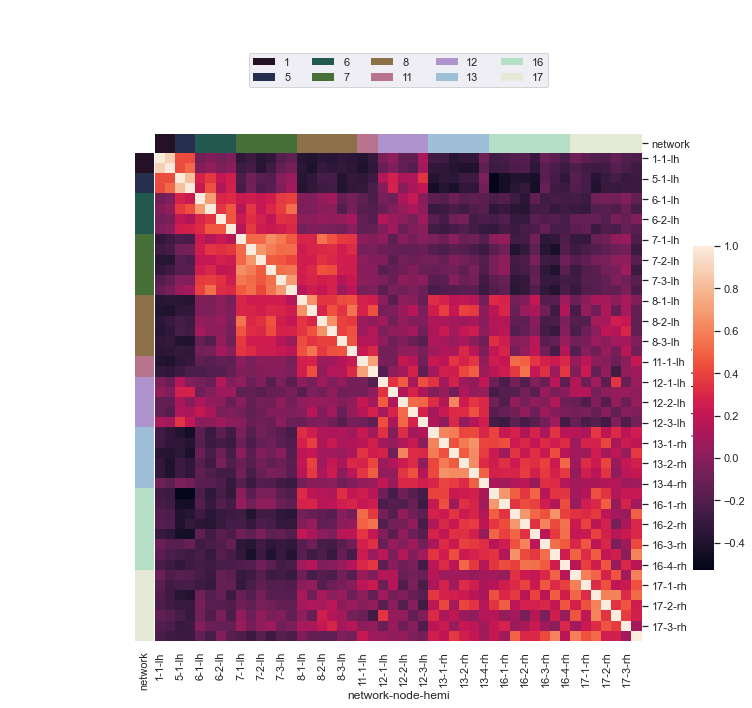

In [27]:
# Draw the full plot
g = sns.clustermap(df.corr(),

                  # Turn off the clustering
                  row_cluster=False, col_cluster=False,

                  # Add colored class labels
                  row_colors=network_colors, col_colors=network_colors,

                  # Make the plot look better when many rows/cols
                  linewidths=0) #, xticklabels=False, yticklabels=False)



# Draw the legend bar for the classes                 
for label in network_labels.unique():
    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=5)

# Adjust the postion of the main colorbar for the heatmap
g.cax.set_position([.97, .2, .03, .45])

In [29]:
from pandarallel import pandarallel
